### Import Libraries

In [1]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("kagglehub version:", kagglehub.__version__) # 0.3.10
print("Pandas version:", pd.__version__) # 2.2.3
print("Seaborn version:", sns.__version__) # 0.13.2

C:\Users\tanel\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


kagglehub version: 0.3.10
Pandas version: 2.2.3
Seaborn version: 0.13.2


# Data Provisioning

### First Dataset
This dataset is synthetic

In [2]:
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
print ("Path to dataset file:", path)

Path to dataset file: C:\Users\tanel\.cache\kagglehub\datasets\uom190346a\sleep-health-and-lifestyle-dataset\versions\2


In [3]:
sleep_df_1 = pd.read_csv("datasets/Sleep_health_and_lifestyle_dataset.csv")
sleep_df_1.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
48,49,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,NaN
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
202,203,Male,43,Engineer,7.8,8,90,5,Normal,130/85,70,8000,Insomnia
207,208,Male,43,Engineer,7.7,8,90,5,Normal,130/85,70,8000,NaN
149,150,Female,39,Accountant,8.0,9,80,3,Normal Weight,115/78,67,7500,NaN
364,365,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
110,111,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,NaN
142,143,Female,38,Accountant,7.1,8,60,4,Normal,115/75,68,7000,NaN
226,227,Female,44,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,Insomnia
89,90,Male,35,Engineer,7.3,8,60,4,Normal,125/80,65,5000,NaN


Check for missing values

In [4]:
sleep_df_1.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Missing values can be replaced by "None", since the missing values represent the absence of a sleep disorder. Values such as `Person ID` and `Occupation` are removed since they are not directly related with sleep quality.

In [5]:
sleep_df_1.fillna("None", inplace=True)
sleep_df_1.rename(columns={'Quality of Sleep':'Sleep Quality'}, inplace=True)
sleep_df_1.drop(columns=['Person ID', 'Occupation', 'Gender', 'BMI Category', 'Sleep Disorder', 'Blood Pressure'], inplace=True)
sleep_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep Duration           374 non-null    float64
 2   Sleep Quality            374 non-null    int64  
 3   Physical Activity Level  374 non-null    int64  
 4   Stress Level             374 non-null    int64  
 5   Heart Rate               374 non-null    int64  
 6   Daily Steps              374 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 20.6 KB


In [6]:
sleep_df_1.sample(10)

,Age,Sleep Duration,Sleep Quality,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
145,38,7.4,7,60,5,84,3300
43,31,7.8,7,75,6,70,8000
295,50,6.0,6,90,8,75,10000
368,59,8.1,9,75,3,68,7000
292,50,6.1,6,90,8,75,10000
214,43,7.8,8,90,5,70,8000
78,33,6.0,6,30,8,72,5000
223,44,6.4,6,45,7,72,6000
72,33,6.1,6,30,8,72,5000
90,35,7.3,8,60,4,65,5000


In [7]:
sleep_df_1.describe()

,Age,Sleep Duration,Sleep Quality,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


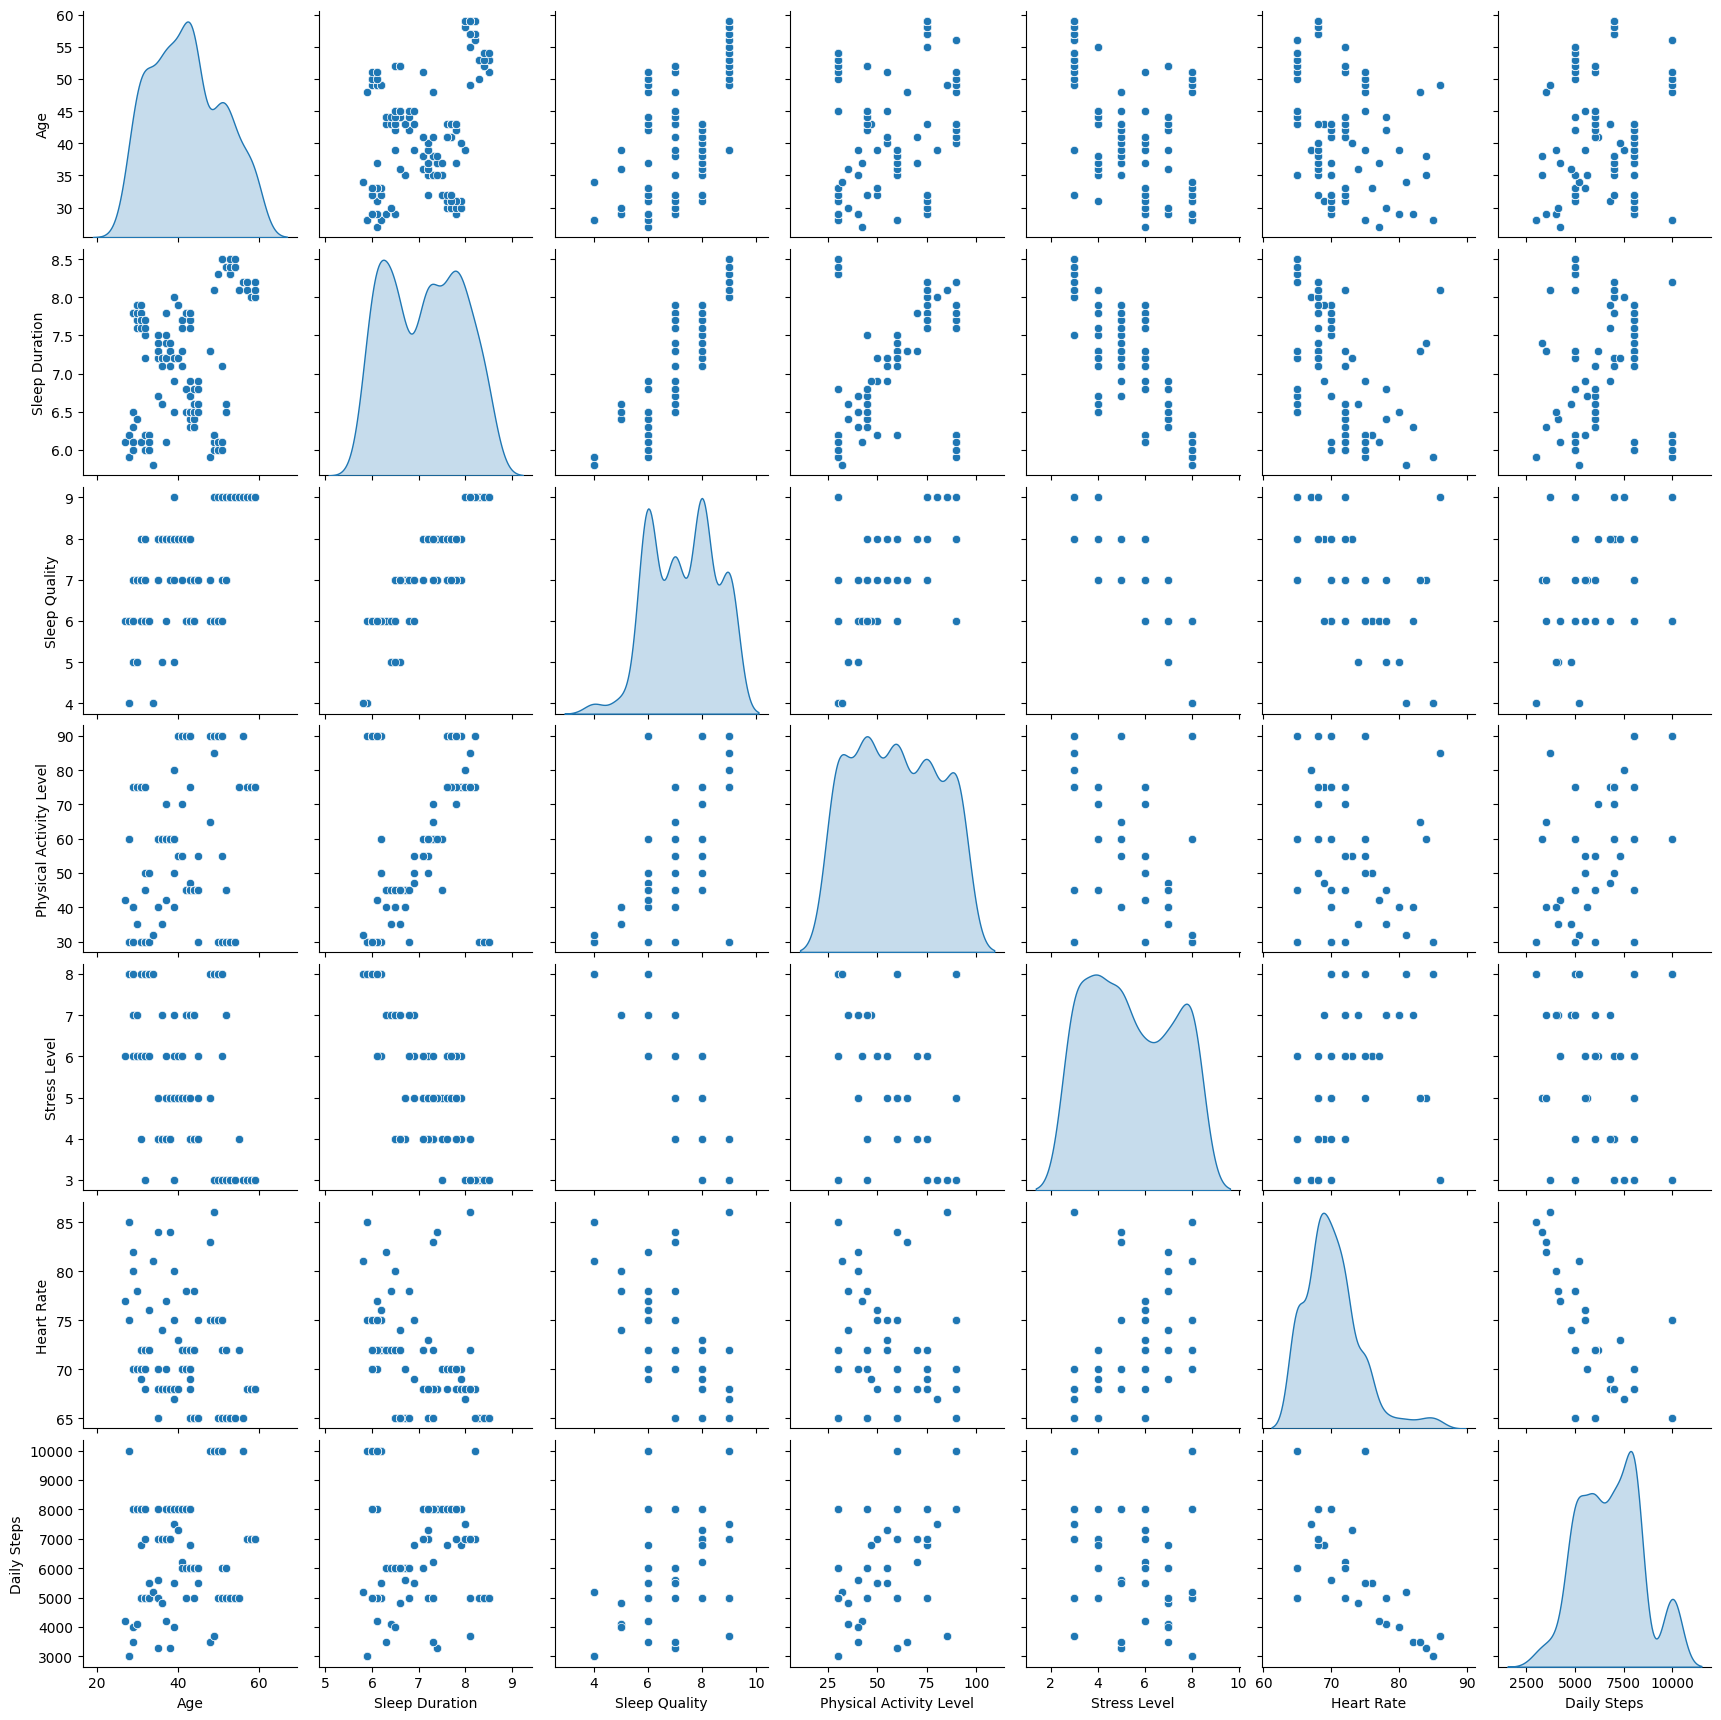

In [8]:
sns.pairplot(sleep_df_1, diag_kind='kde')

<Axes: >

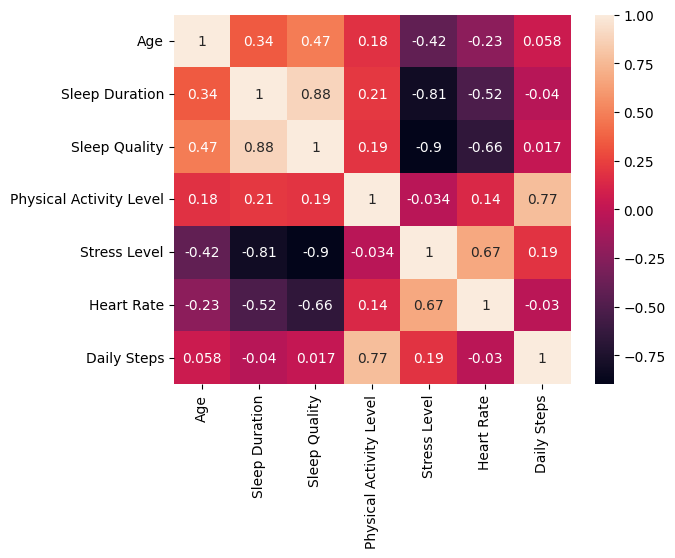

In [9]:
correlation = sleep_df_1.corr()
sns.heatmap(correlation, annot=True)

### Second Dataset
This dataset is obtained as part of a study conducted in Morocco by a group of AI Engineering students from ENSIAS

In [10]:
path = kagglehub.dataset_download("equilibriumm/sleep-efficiency")
print ("Path to dataset file:", path)

Path to dataset file: C:\Users\tanel\.cache\kagglehub\datasets\equilibriumm\sleep-efficiency\versions\3


In [11]:
sleep_df_2 = pd.read_csv("datasets/Sleep_Efficiency.csv")
sleep_df_2.sample(10)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
142,143,48,Male,2021-02-04 22:00:00,2021-02-04 05:00:00,7.0,0.81,27,55,18,3.0,0.0,3.0,No,3.0
201,202,64,Female,2021-10-18 02:00:00,2021-10-18 10:00:00,8.0,0.71,23,58,19,2.0,50.0,0.0,No,0.0
378,379,25,Male,2021-02-15 00:00:00,2021-02-15 07:00:00,7.0,0.88,18,75,7,0.0,0.0,5.0,No,2.0
221,222,41,Female,2021-12-17 23:00:00,2021-12-17 07:30:00,8.5,0.85,20,67,13,0.0,25.0,1.0,Yes,0.0
58,59,34,Female,2021-11-07 01:30:00,2021-11-07 08:30:00,7.0,0.71,22,65,13,3.0,50.0,0.0,No,1.0
210,211,61,Male,2021-10-20 00:00:00,2021-10-20 07:00:00,7.0,0.86,23,60,17,0.0,0.0,0.0,No,0.0
348,349,57,Male,2021-04-17 01:30:00,2021-04-17 08:30:00,7.0,0.88,22,65,13,0.0,25.0,0.0,Yes,1.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0
387,388,48,Female,2021-07-14 21:00:00,2021-07-14 04:00:00,7.0,0.93,30,60,10,1.0,0.0,0.0,No,3.0
106,107,53,Male,2021-05-19 21:00:00,2021-05-19 04:00:00,7.0,0.63,25,20,55,3.0,0.0,5.0,No,2.0


In [12]:
sleep_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [13]:
sleep_df_2.dropna(inplace=True)
sleep_df_2.rename(columns={'Sleep duration':'Sleep Duration'}, inplace=True)
sleep_df_2.drop(columns=['ID', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings'], inplace=True)
sleep_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 451
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   388 non-null    int64  
 1   Gender                388 non-null    object 
 2   Bedtime               388 non-null    object 
 3   Wakeup time           388 non-null    object 
 4   Sleep Duration        388 non-null    float64
 5   Caffeine consumption  388 non-null    float64
 6   Alcohol consumption   388 non-null    float64
 7   Smoking status        388 non-null    object 
 8   Exercise frequency    388 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 30.3+ KB


In [14]:
sleep_df_2.sample(10)

,Age,Gender,Bedtime,Wakeup time,Sleep Duration,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
236,58,Male,2021-12-15 21:30:00,2021-12-15 05:00:00,7.5,0.0,3.0,No,0.0
31,18,Male,2021-05-24 00:30:00,2021-05-24 08:30:00,8.0,25.0,0.0,No,0.0
384,40,Male,2021-09-25 21:00:00,2021-09-25 04:00:00,7.0,0.0,0.0,Yes,3.0
82,66,Male,2021-07-03 02:00:00,2021-07-03 09:30:00,7.5,0.0,0.0,Yes,3.0
300,47,Female,2021-10-09 22:30:00,2021-10-09 05:30:00,7.0,0.0,3.0,No,4.0
174,48,Female,2021-07-26 22:30:00,2021-07-26 06:30:00,8.0,0.0,0.0,No,4.0
330,49,Male,2021-05-21 22:30:00,2021-05-21 04:00:00,5.5,0.0,0.0,No,0.0
257,27,Female,2021-05-31 22:00:00,2021-05-31 06:00:00,8.0,25.0,5.0,Yes,5.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.0,3.0,No,3.0
9,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,0.0,0.0,No,0.0


In [15]:
sleep_df_2.describe()

,Age,Sleep Duration,Caffeine consumption,Alcohol consumption,Exercise frequency
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,40.829897,7.451031,22.680412,1.146907,1.757732
std,13.403187,0.883483,28.997566,1.612793,1.447824
min,9.000000,5.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.000000,0.000000,0.000000
50%,41.000000,7.500000,0.000000,0.000000,2.000000
75%,52.000000,8.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,200.000000,5.000000,5.000000


### Third Dataset
This dataset is synthetic, but designed to reflect realistic patterns.

In [16]:
path = kagglehub.dataset_download("adilshamim8/sleep-cycle-and-productivity")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\tanel\.cache\kagglehub\datasets\adilshamim8\sleep-cycle-and-productivity\versions\1


In [17]:
sleep_df_3 = pd.read_csv("datasets/sleep_cycle_productivity.csv")
sleep_df_3.sample(10)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
3302,2024-05-30,7613,44,Male,23.05,8.04,8.99,2,41,49,56,6.989197,5,9,10
823,2024-12-13,2612,29,Female,20.93,6.18,9.25,7,57,253,179,6.905061,3,1,3
961,2024-01-06,4190,48,Female,22.23,4.78,6.55,3,27,288,139,8.556095,8,9,5
3935,2024-03-08,6078,46,Female,23.60,7.78,8.18,10,52,87,126,5.956613,8,4,9
2068,2024-09-03,1984,38,Female,23.25,5.21,5.96,2,89,103,126,11.045403,9,8,6
3733,2024-12-19,4552,36,Female,22.87,4.54,5.68,10,70,183,103,6.772457,1,6,1
1790,2024-03-17,9734,56,Female,21.35,6.19,8.84,6,87,199,14,11.023605,6,7,9
3851,2024-12-24,2444,50,Male,23.95,8.94,8.99,2,12,165,156,5.589934,4,8,5
4207,2024-04-29,7045,50,Male,21.03,3.47,6.44,2,25,17,65,4.759747,1,8,2
3568,2024-06-27,5261,58,Female,22.72,8.21,9.49,2,49,165,85,11.537681,7,7,1


In [18]:
sleep_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

In [19]:
sleep_df_3.rename(columns={'Total Sleep Hours':'Sleep duration'}, inplace=True)
sleep_df_3.drop(columns=['Date', 'Person_ID', 'Sleep Start Time', 'Sleep End Time', 'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score', 'Gender'], inplace=True)
sleep_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5000 non-null   int64  
 1   Sleep duration                 5000 non-null   float64
 2   Sleep Quality                  5000 non-null   int64  
 3   Exercise (mins/day)            5000 non-null   int64  
 4   Caffeine Intake (mg)           5000 non-null   int64  
 5   Screen Time Before Bed (mins)  5000 non-null   int64  
 6   Stress Level                   5000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [20]:
sleep_df_3.describe()

,Age,Sleep duration,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,38.590600,6.974902,5.520800,43.962600,146.71140,91.421200,5.548000
std,12.302799,1.454033,2.863845,25.798541,85.83139,52.079123,2.888419
min,18.000000,4.500000,1.000000,0.000000,0.00000,0.000000,1.000000
25%,28.000000,5.690000,3.000000,22.000000,73.00000,46.000000,3.000000
50%,39.000000,6.960000,5.000000,44.000000,144.00000,92.000000,6.000000
75%,49.000000,8.210000,8.000000,66.000000,220.00000,136.000000,8.000000
max,59.000000,9.500000,10.000000,89.000000,299.00000,179.000000,10.000000


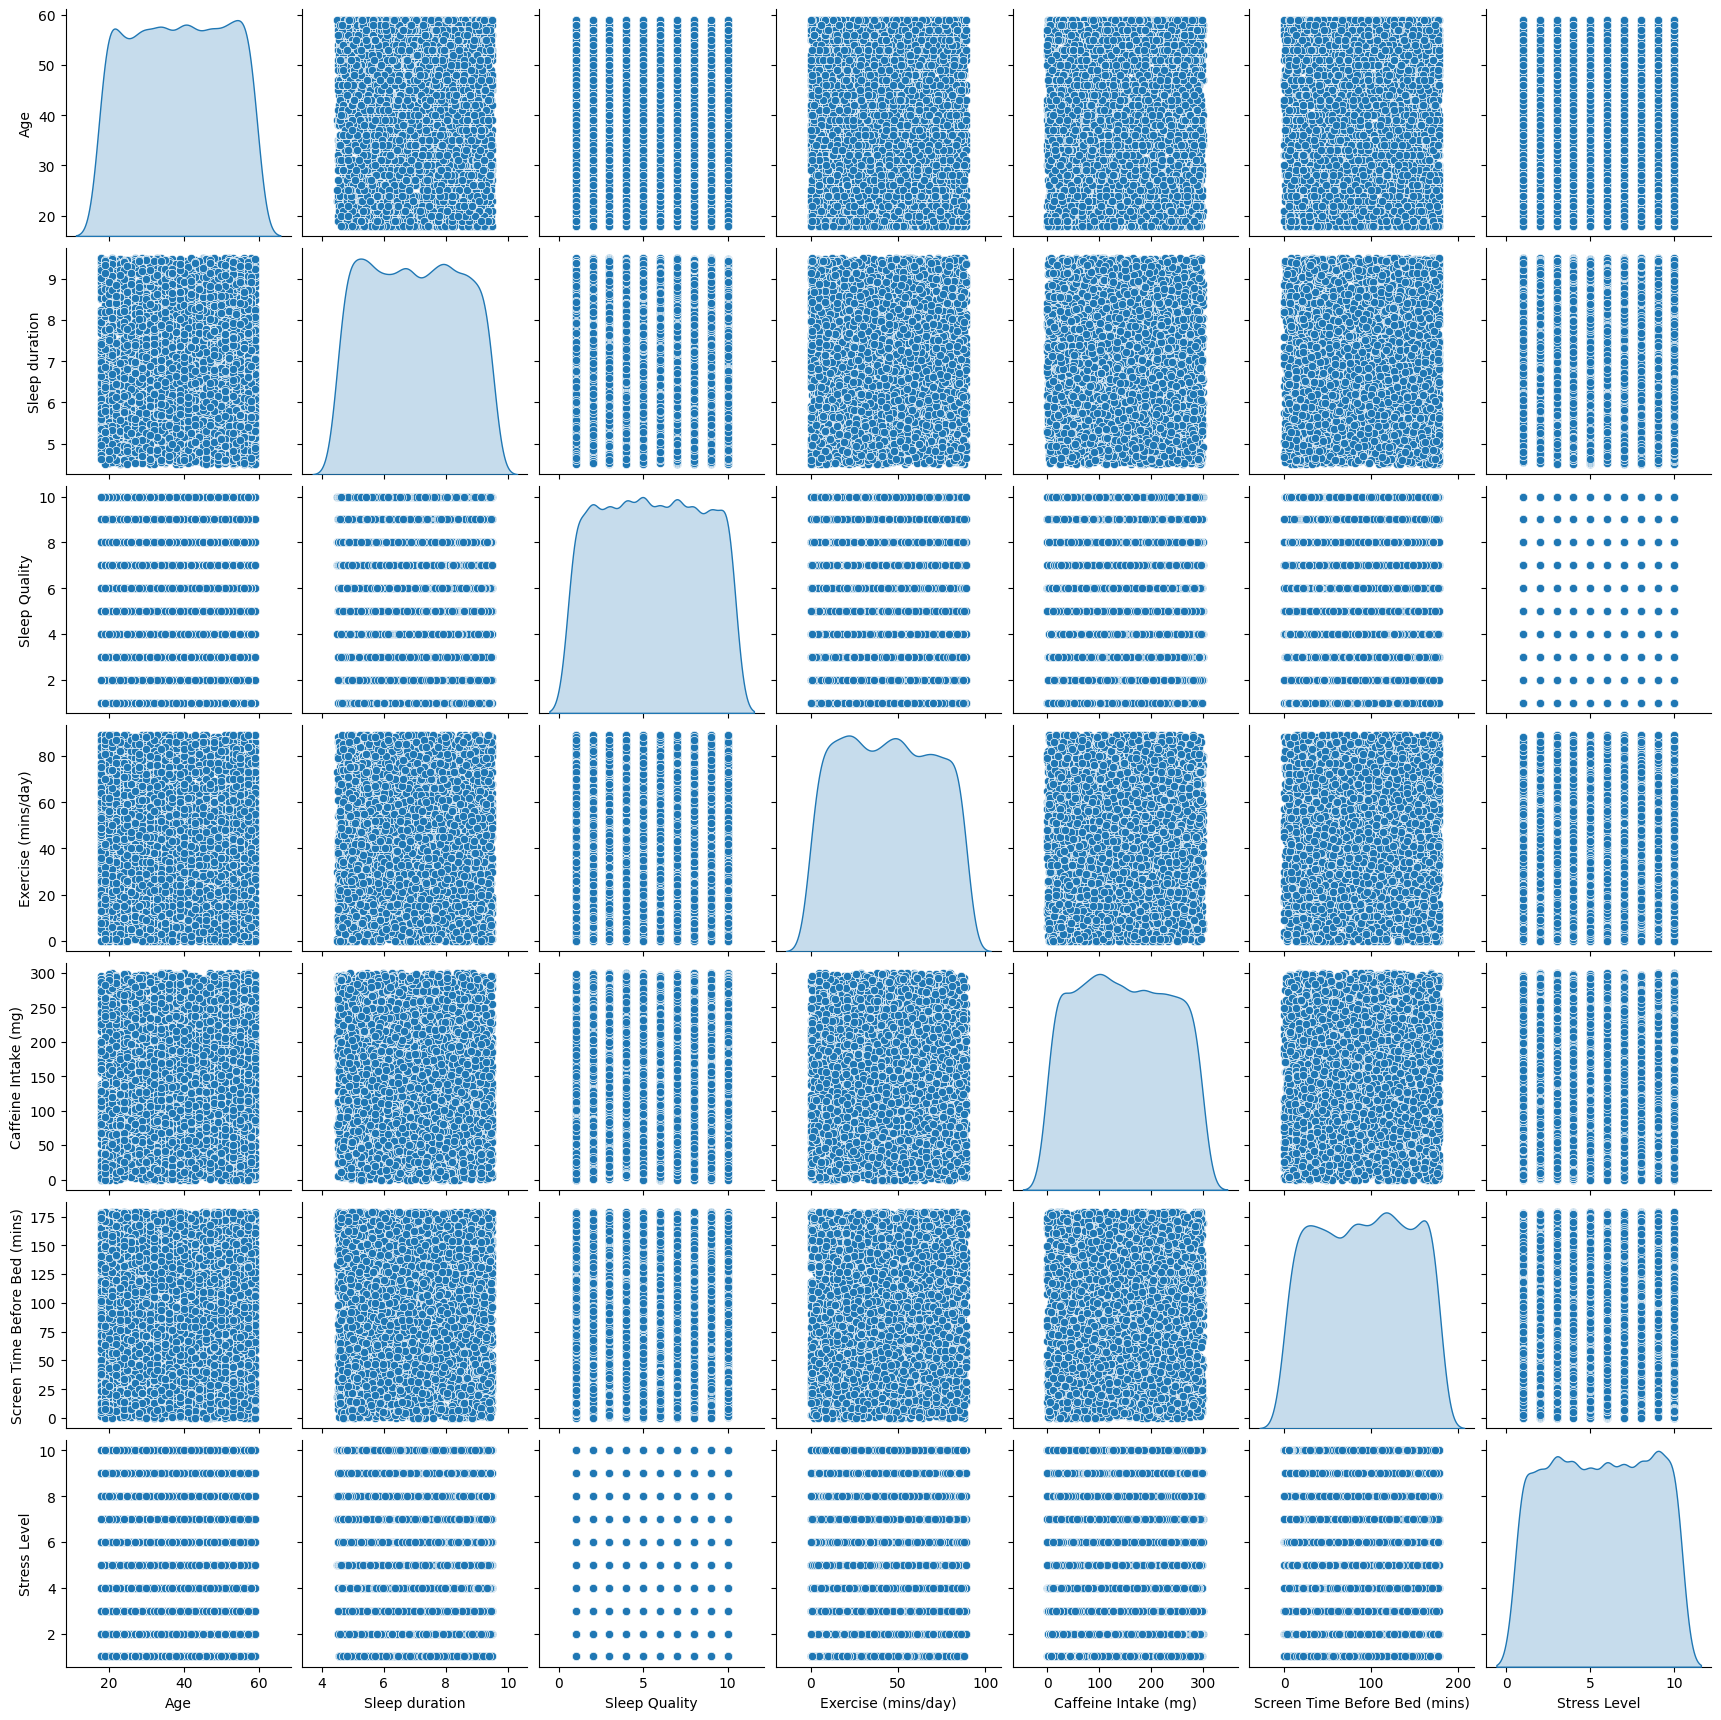

In [21]:
sns.pairplot(sleep_df_3, diag_kind='kde')

<Axes: >

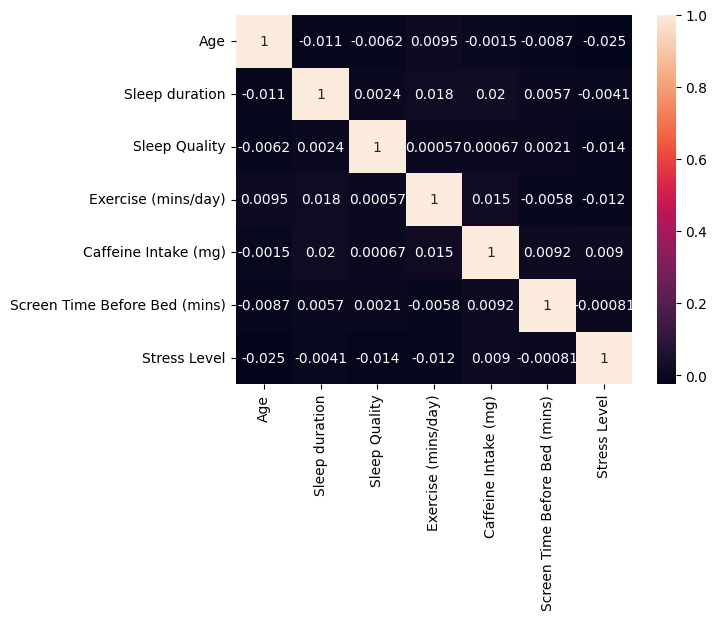

In [22]:
correlation = sleep_df_3.corr()
sns.heatmap(correlation, annot=True)

### Fourth Dataset
This dataset is synthetic

In [23]:
path = kagglehub.dataset_download("uom190346a/sleep-and-health-metrics")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\tanel\.cache\kagglehub\datasets\uom190346a\sleep-and-health-metrics\versions\2


In [24]:
sleep_df_4 = pd.read_csv("datasets/wearable_tech_sleep_quality_1.csv")
sleep_df_4.sample(10)

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
210,81.417810,35.878068,0.749592,9.275241,1.000000,160.716992,6.967705,0.973483,9.245888
784,81.195809,36.541220,1.512797,8.196555,1.000000,136.191767,6.368901,0.538681,5.592173
456,67.859393,36.876671,1.419947,9.133154,3.130278,87.134569,2.636036,0.318062,10.014609
518,71.986646,35.987907,1.770200,9.419278,9.824206,26.043771,0.000000,0.024201,6.731451
108,75.151008,36.188116,1.671382,8.175905,6.627032,42.631134,6.068416,0.026504,10.213549
138,86.270344,36.798700,0.760893,8.210208,3.291392,80.764923,5.087658,0.394401,4.765656
771,58.750664,37.347526,1.253422,6.753644,1.000000,133.575801,5.067049,0.459129,11.137038
158,46.173930,36.990883,3.281644,9.492961,1.000000,131.585418,5.184754,0.329101,8.871895
390,52.031707,36.729986,0.153812,5.134505,3.356055,80.058546,1.116283,0.756559,8.791828
754,51.012022,36.755601,1.926052,6.461625,1.000000,130.421473,1.116864,0.510810,6.687806


In [25]:
sleep_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [26]:
sleep_df_4.drop(columns=['Heart_Rate_Variability', 'Movement_During_Sleep'], inplace=True)
sleep_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Body_Temperature      1000 non-null   float64
 1   Sleep_Duration_Hours  1000 non-null   float64
 2   Sleep_Quality_Score   1000 non-null   float64
 3   Caffeine_Intake_mg    1000 non-null   float64
 4   Stress_Level          1000 non-null   float64
 5   Bedtime_Consistency   1000 non-null   float64
 6   Light_Exposure_hours  1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


### Combined Dataset

In [27]:
merged_df_1 = pd.concat([sleep_df_1, sleep_df_2])
merged_df_1.sample(10)

,Age,Sleep Duration,Sleep Quality,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender,Bedtime,Wakeup time,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
214,27,7.5,NaN,NaN,NaN,NaN,NaN,Male,2021-09-25 00:30:00,2021-09-25 08:00:00,25.0,2.0,No,2.0
299,51,8.5,9.0,30.0,3.0,65.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,54,8.0,NaN,NaN,NaN,NaN,NaN,Male,2021-12-09 23:00:00,2021-12-09 07:00:00,0.0,3.0,No,3.0
61,56,7.0,NaN,NaN,NaN,NaN,NaN,Male,2021-09-30 22:30:00,2021-09-30 05:30:00,0.0,0.0,No,4.0
297,27,8.0,NaN,NaN,NaN,NaN,NaN,Female,2021-01-11 00:30:00,2021-01-11 08:30:00,25.0,1.0,Yes,0.0
162,53,7.0,NaN,NaN,NaN,NaN,NaN,Male,2021-05-31 22:00:00,2021-05-31 05:00:00,0.0,0.0,No,0.0
134,27,7.0,NaN,NaN,NaN,NaN,NaN,Male,2021-10-23 23:00:00,2021-10-23 06:00:00,75.0,2.0,Yes,2.0
76,47,7.0,NaN,NaN,NaN,NaN,NaN,Female,2021-09-02 21:00:00,2021-09-02 04:00:00,0.0,0.0,No,3.0
92,35,7.5,8.0,60.0,5.0,70.0,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,37,7.2,8.0,60.0,4.0,68.0,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
merged_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      762 non-null    int64  
 1   Sleep Duration           762 non-null    float64
 2   Sleep Quality            374 non-null    float64
 3   Physical Activity Level  374 non-null    float64
 4   Stress Level             374 non-null    float64
 5   Heart Rate               374 non-null    float64
 6   Daily Steps              374 non-null    float64
 7   Gender                   388 non-null    object 
 8   Bedtime                  388 non-null    object 
 9   Wakeup time              388 non-null    object 
 10  Caffeine consumption     388 non-null    float64
 11  Alcohol consumption      388 non-null    float64
 12  Smoking status           388 non-null    object 
 13  Exercise frequency       388 non-null    float64
dtypes: float64(9), int64(1), object

In [29]:
merged_df_1.describe()

,Age,Sleep Duration,Sleep Quality,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Caffeine consumption,Alcohol consumption,Exercise frequency
count,762.000000,762.000000,374.000000,374.000000,374.000000,374.000000,374.000000,388.000000,388.000000,388.000000
mean,41.494751,7.294488,7.312834,59.171123,5.385027,70.165775,6816.844920,22.680412,1.146907,1.757732
std,11.344010,0.855973,1.196956,20.830804,1.774526,4.135676,1617.915679,28.997566,1.612793,1.447824
min,9.000000,5.000000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.000000,0.000000,0.000000
25%,32.000000,6.800000,6.000000,45.000000,4.000000,68.000000,5600.000000,0.000000,0.000000,0.000000
50%,41.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,0.000000,0.000000,2.000000
75%,50.000000,8.000000,8.000000,75.000000,7.000000,72.000000,8000.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,9.000000,90.000000,8.000000,86.000000,10000.000000,200.000000,5.000000,5.000000
